In [1]:
import nltk
import re
import pandas as pd
import numpy
import csv
import string
from nltk.corpus import stopwords
import pickle

try:
    stop_words = set(stopwords.words("english"))
except LookupError:
    nltk.download('stopwords')
    stop_words = set(stopwords.words("english"))


# Loading Data

In [2]:
data = pd.read_csv("London_hotel_reviews.csv", encoding='ISO-8859-1')
import chardet

In [3]:
with open("London_hotel_reviews.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [4]:
data.head(20)

,Property Name,Review Rating,Review Title,Review Text,Location Of The Reviewer,Date Of Review
0,Apex London Wall Hotel,5,Ottima qualità prezzo,Siamo stati a Londra per un week end ed abbiam...,"Casale Monferrato, Italy",10/20/2012
1,Corinthia Hotel London,5,"By far, my best hotel in the world",I had a pleasure of staying in this hotel for ...,"Savannah, Georgia",3/23/2016
2,The Savoy,5,First visit to the American Bar at the Savoy,A very lovely first visit to this iconic hotel...,London,7/30/2013
3,Rhodes Hotel,4,Nice stay,3 of us stayed at the Rhodes Hotel for 4 night...,"Maui, Hawaii",6/2/2012
4,The Savoy,5,Perfection,Form the moment we arrived until we left we ex...,"London, United Kingdom",11/24/2017
5,Corinthia Hotel London,1,Staff stole from me!!,Well I am no strange to London's 5star hotels ...,NaN,3/1/2013
6,Apex London Wall Hotel,5,Great customer service and comfy bed,"The hotel staff were very helpful, I booked th...","Lostwithiel, United Kingdom",10/22/2017
7,Mondrian London at Sea Containers,5,"Yes, it's really good!",Already stepping out of the taxi you get that ...,Stockholm,12/16/2014
8,Mondrian London at Sea Containers,5,Incredible,What an incredibly cool place. Had the most de...,"London, England, United Kingdom",3/5/2016
9,Rhodes Hotel,5,Ottima scelta!,"Ottimo rapporto qualità - prezzo, ottima la po...",Cagliari,2/7/2011


In [5]:
data1 = data.copy()

#  Cleaning the data to make it more easy to process

# Convert text to lower case

In [6]:
data1["Property Name"] = data["Property Name"].apply(lambda x: x.lower() if type(x) == str else x)
data1["Review Title"] = data["Review Title"].apply(lambda x: x.lower() if type(x) == str else x)
data1["Review Text"] = data["Review Text"].apply(lambda x: x.lower() if type(x) == str else x)
data1["Location Of The Reviewer"] = data["Location Of The Reviewer"].apply(lambda x: x.lower() if type(x) == str else x)

In [7]:

#Removing unwanted text like u+....
for i in data1.index:
    row = str(data1.loc[i, 'Review Text'])
    #row = re.sub(r'[\W_]+', '', row)
    #row = re.sub(r'\W', '', row, flags=re.UNICODE)
    row = re.sub(r'([<]*[u+a-z|0-9]*[>])|(\||!|\.|\,)', '', row)
    data1.loc[i, 'Review Text'] = row
#data2.head(10)

In [8]:
data1['Review Text'][440]

'      bar boulud    '

# Tokenize Text

In [9]:
from nltk.tokenize import word_tokenize as wd
def tokenize(line):
    word = wd(line)
    return word

In [10]:
try:
    data1["Property Name"] = data1["Property Name"].apply(lambda x: tokenize(x) if type(x) == str else x)
    data1["Review Title"] = data1["Review Title"].apply(lambda x: tokenize(x) if type(x) == str else x)
    data1["Review Text"] = data1["Review Text"].apply(lambda x: tokenize(x) if type(x) == str else x)
    data1["Location Of The Reviewer"] = data1["Location Of The Reviewer"].apply(lambda x: tokenize(x) if type(x) == str else x)
except LookupError:
    nltk.download('punkt')
    data1["Property Name"] = data1["Property Name"].apply(lambda x: tokenize(x) if type(x) == str else x)
    data1["Review Title"] = data1["Review Title"].apply(lambda x: tokenize(x) if type(x) == str else x)
    data1["Review Text"] = data1["Review Text"].apply(lambda x: tokenize(x) if type(x) == str else x)
    data1["Location Of The Reviewer"] = data1["Location Of The Reviewer"].apply(lambda x: tokenize(x) if type(x) == str else x)

In [11]:
data2 = data1.copy()

# Further Cleaning: Removing Punctuation and stopwords

In [12]:
def remove_punctuation(column_name):
    all_sentences = []
    for i in data2.index:
        my_sentence = []
        custom_stopwords=["a","'s","..."," 's", "'m ","i ",",","\t","room","hotel","stay"]
        pr=data2.loc[i, column_name]
        if(type(pr) != float):
            for item in pr:
                if(item not in string.punctuation):
                    if (item not in stop_words):
                        if(item not in custom_stopwords):
                            if column_name!="Review Text":
                                my_sentence.append(item)
                            elif(item in words or not item.isalpha()):
                                if(len(item) > 3):
                                    my_sentence.append(item)
        final_sentence = " ".join(my_sentence)
        all_sentences.append(final_sentence)
        
    return all_sentences


In [13]:
try:
    words = set(nltk.corpus.words.words())
except LookupError:
    nltk.download('words')
    words = set(nltk.corpus.words.words())

In [14]:
all_sentence = remove_punctuation("Review Text")
data2["Review Text"] = all_sentence
all_sentence = remove_punctuation("Property Name")
data2["Property Name"] = all_sentence
all_sentence = remove_punctuation("Review Title")
data2["Review Title"] = all_sentence
all_sentence = remove_punctuation("Location Of The Reviewer")
data2["Location Of The Reviewer"] = all_sentence

In [15]:
#Removing Empty rows
for i in data2.index:
    row = data2.loc[i, 'Review Text']
    if (row==""):
        data2.drop(i,inplace=True)

In [16]:
print(data2)

          Property Name  Review Rating                    Review Title  \
0      apex london wall              5           ottima qualità prezzo   
1      corinthia london              5                  far best world   
2                 savoy              5  first visit american bar savoy   
3                rhodes              4                            nice   
4                 savoy              5                      perfection   
...                 ...            ...                             ...   
27325  corinthia london              5       best 5 star luxury london   
27326                 z              3                    mala estadia   
27327         rembrandt              4  excellent outstanding location   
27328        dorchester              4     trevliga rum men högljud ac   
27329             savoy              5                    great always   

                                             Review Text  \
0      week gentile stereo bose fine visto zone com

# Saving cleaned data as csv

In [17]:
data2.to_csv(path_or_buf="./clean_data.csv")

In [18]:
data3=pd.read_csv("clean_data.csv")

# Loading Data Processed by SentiStrength

In [19]:
data3["Review Text"].to_csv(path_or_buf="./textFinal.txt", sep="\t", index=None,header=False)

In [20]:
data_sentiment = pd.read_csv("analyzed_data.csv")

# Calculating Overall Sentiment & storing in separate dataframe

In [21]:
def calculate_overall_sentiment(df):
    overall_sentiment = []
    for i in df.index:
        try:
            positive = int(df["Positive"][i])
            negative = int(df["Negative"][i])
        except ValueError:
            print(i)
            print(df.index)
        overall = positive + negative
        overall_sentiment.append(overall)
    return overall_sentiment
        

In [22]:
data3["Positive"] = data_sentiment["Positive"]
data3["Negative"] = data_sentiment["Negative"]

In [23]:
df_correlation = data3.drop(labels="Property Name",axis="columns")
df_correlation = df_correlation.drop(labels="Review Text",axis="columns")
df_correlation = df_correlation.drop(labels="Location Of The Reviewer",axis="columns")
df_correlation = df_correlation.drop(labels="Date Of Review",axis="columns")
df_correlation = df_correlation.drop(labels="Review Title",axis="columns")
overall_sentiment = calculate_overall_sentiment(df_correlation)
df_correlation["Overall Sentiment"] = overall_sentiment

In [24]:
D1 = data3.copy()

In [25]:
D1["Positive"] = data_sentiment["Positive"]
D1["Negative"] = data_sentiment["Negative"]
D1["Overall Sentiment"] = df_correlation["Overall Sentiment"]

# Saving D1 with positive, negative and overall sentiment values

In [26]:
D1.to_csv('./D1.csv')

# Calculating Pearson Correlation Coefficient

In [27]:
df_correlation.corr(method='pearson')

,Unnamed: 0,Review Rating,Positive,Negative,Overall Sentiment
Unnamed: 0,1.000000,-0.011176,-0.006111,-0.010085,-0.011702
Review Rating,-0.011176,1.000000,0.250499,0.323336,0.418078
Positive,-0.006111,0.250499,1.000000,-0.079956,0.731788
Negative,-0.010085,0.323336,-0.079956,1.000000,0.620840
Overall Sentiment,-0.011702,0.418078,0.731788,0.620840,1.000000


# Calculating First order statistics (Mean) of reviews grouped by hotels

In [28]:
data3.groupby(['Property Name']).mean()

,Unnamed: 0,Review Rating,Positive,Negative
Property Name,,,,
45 park lane dorchester collection,12910.703704,4.746032,3.190476,-1.518519
apex london wall,13639.868733,4.695533,2.990884,-1.527347
bulgari london,14199.846320,4.705628,2.937229,-1.545455
city view,12646.166667,1.611111,2.222222,-2.444444
corinthia london,13560.073821,4.788261,3.185092,-1.648181
dorchester,13673.953199,4.623815,3.122630,-1.758294
hartley,13946.136364,1.568182,1.977273,-2.568182
lanesborough,12975.141479,4.803859,3.096463,-1.540193
london guest house,13493.428571,4.135135,2.474903,-1.552124


# Calculating Second order statistics (Standard Deviation) of reviews grouped by hotels

In [29]:
data3.groupby(['Property Name']).std()

,Unnamed: 0,Review Rating,Positive,Negative
Property Name,,,,
45 park lane dorchester collection,7964.710361,0.564035,0.890681,0.740849
apex london wall,7918.964234,0.579564,0.933693,0.742452
bulgari london,8082.352087,0.706286,1.023773,0.799329
city view,7797.246341,0.777544,0.808452,1.338226
corinthia london,7901.497204,0.636741,0.910803,0.787893
dorchester,8057.689189,0.814845,0.896418,0.866755
hartley,8026.731391,0.899554,0.999736,1.227547
lanesborough,8094.598909,0.629991,0.948864,0.756152
london guest house,7936.135079,0.863269,0.907734,0.807058


# Selecting STD threshold at 75% for ambigous class

In [30]:
max_values = data3.groupby(['Property Name']).std().max()
max_std = max_values["Review Rating"]
std_threshold = max_std * 0.60 
print(std_threshold)

0.9014101855318948


In [31]:
high_std = data3.groupby(['Property Name']).std()
high_std = high_std.drop(['Positive', 'Negative'], axis=1)
high_std = high_std['Review Rating'] > std_threshold
high_std

Property Name
45 park lane dorchester collection                  False
apex london wall                                    False
bulgari london                                      False
city view                                           False
corinthia london                                    False
dorchester                                          False
hartley                                             False
lanesborough                                        False
london guest house                                  False
mandarin oriental hyde park london                   True
marble arch                                          True
mondrian london sea containers                      False
newham                                               True
rembrandt                                            True
rhodes                                               True
ridgemount                                          False
savoy                                               False


In [32]:
hotel_list = ['newham', 'marble arch', 'z', 'mandarin oriental hyde park london', 'rembrandt', 'rhodes']

In [33]:
def assign_ambigous(hotel_list, df):
    for i in df.index:
        if(df['Property Name'][i] in hotel_list):
            df.loc[i, 'Ambigous'] = "Yes"
            #df["Ambigous"][i] = 'Yes'
        else:
            df.loc[i, 'Ambigous'] = "Not Ambigous"
            #df["Ambigous"][i] = 'Not Ambigous'

In [34]:
data_with_ambiguity = data3.copy()
#Creating Empty Colum called Ambigous
data_with_ambiguity['Ambigous'] = ""

In [35]:
assign_ambigous(hotel_list,data_with_ambiguity)

# Adding 'Ambigous' attribute to the database D1

In [36]:
D1["Ambigous"] = data_with_ambiguity["Ambigous"]

# Saving changes and writing to database D1

In [37]:
D1.to_csv('./D1.csv')

In [38]:
D1.head(30)

,Unnamed: 0,Property Name,Review Rating,Review Title,Review Text,Location Of The Reviewer,Date Of Review,Positive,Negative,Overall Sentiment,Ambigous
0,0,apex london wall,5,ottima qualità prezzo,week gentile stereo bose fine visto zone come ...,casale monferrato italy,10/20/2012,3,-2,1,Not Ambigous
1,1,corinthia london,5,far best world,pleasure nights recently perfect every communi...,savannah georgia,3/23/2016,3,-1,2,Not Ambigous
2,2,savoy,5,first visit american bar savoy,lovely first visit iconic wonderful service wi...,london,7/30/2013,3,-2,1,Not Ambigous
3,3,rhodes,4,nice,stayed nights great location taking express li...,maui hawaii,6/2/2012,3,-2,1,Yes
4,4,savoy,5,perfection,form moment left experienced absolute perfecti...,london united kingdom,11/24/2017,2,-1,1,Not Ambigous
5,5,corinthia london,1,staff stole,well strange 5star comes along eager work indu...,NaN,3/1/2013,3,-2,1,Not Ambigous
6,6,apex london wall,5,great customer service comfy bed,staff helpful booked wrong mistake without has...,lostwithiel united kingdom,10/22/2017,3,-2,1,Not Ambigous
7,7,mondrian london sea containers,5,yes really good,already stepping taxi special feeling welcome ...,stockholm,12/16/2014,4,-2,2,Not Ambigous
8,8,mondrian london sea containers,5,incredible,incredibly cool place delicious interesting da...,london england united kingdom,3/5/2016,4,-1,3,Not Ambigous
9,9,rhodes,5,ottima scelta,stanza solo come quei tutti,cagliari,2/7/2011,1,-1,0,Yes


## DataFrame with only reviews of hotels belonging to Ambigous Class

In [39]:
#DataFrame with only data of hotels with standard deviation above threshold
filtered_data = D1.copy()
filtered_data = filtered_data.loc[(filtered_data['Property Name'] == 'z') | (filtered_data['Property Name'] == 'marble arch') | (filtered_data['Property Name'] == 'newham') | (filtered_data['Property Name'] == 'mandarin oriental hyde park london') | (filtered_data['Property Name'] == 'rembrandt') | (filtered_data['Property Name'] == 'rhodes')]

In [40]:
filtered_data.head(50)

,Unnamed: 0,Property Name,Review Rating,Review Title,Review Text,Location Of The Reviewer,Date Of Review,Positive,Negative,Overall Sentiment,Ambigous
3,3,rhodes,4,nice,stayed nights great location taking express li...,maui hawaii,6/2/2012,3,-2,1,Yes
9,9,rhodes,5,ottima scelta,stanza solo come quei tutti,cagliari,2/7/2011,1,-1,0,Yes
11,11,mandarin oriental hyde park london,4,good needs touch-up improved layout entrance f...,location next park close great shopping nearby...,oslo norway,2/17/2014,3,-2,1,Yes
17,17,mandarin oriental hyde park london,5,beautiful,mandarin five star rating beautiful spacious w...,los angeles california,8/31/2014,4,-1,3,Yes
22,22,rhodes,4,great hosts,maria wonderful stayed honeymoon bought champa...,rochester ny girl harrisburg pa,5/17/2007,4,-1,3,Yes
23,23,z,5,excellent rapport qualité prix,pied passage station north acton central line ...,paris france,1/5/2016,1,-1,0,Yes
28,28,rhodes,5,true,always little skeptical read glowing true loca...,san diego,10/5/2006,4,-2,2,Yes
31,31,mandarin oriental hyde park london,5,exceptional service great location brilliant food,mandarin oriental park pretty much everything ...,england,5/17/2015,4,-1,3,Yes
37,37,rembrandt,5,good great area,good lovely area handy tube breakfast good cof...,NaN,11/4/2016,2,-2,0,Yes
42,42,mandarin oriental hyde park london,5,amazing 5 star,came back marvelous mandarin oriental park eve...,sao paulo sp,11/19/2015,4,-1,3,Yes


In [41]:
def classify_ambigous(hotel_name, data):
    sentiment_score = 0
    #Calculating the overall sentiment for one specific hotel
    for review in data.index:
        if(data['Property Name'][review] == hotel_name):
            sentiment_score += data['Overall Sentiment'][review]
    
    #Classifying the ambigous class hotel to either positive or negative.
    for i in data.index:
        if(data['Property Name'][i] == hotel_name):
            if(sentiment_score > 0):
                data.loc[i, 'Ambigous'] = 1
            else:
                data.loc[i, 'Ambigous'] = -1
                
        
    

In [42]:
classify_ambigous('z', filtered_data)
classify_ambigous('marble arch', filtered_data)
classify_ambigous('newham', filtered_data)
classify_ambigous('rhodes', filtered_data)
classify_ambigous('rembrandt', filtered_data)
classify_ambigous('mandarin oriental hyde park london', filtered_data)

# Generate Histogram

In [43]:
import matplotlib as plt
%matplotlib inline

In [44]:
#filtered_data.hist(column='Property Name', by=None)

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>, <AxesSubplot:>]], dtype=object)

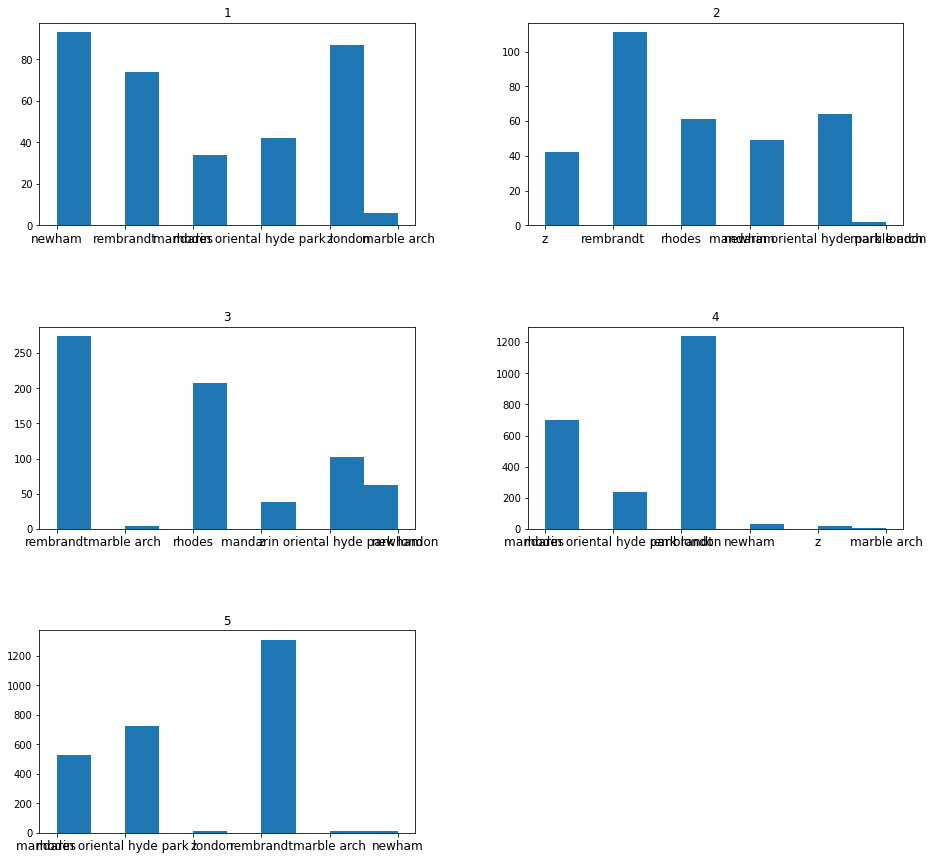

In [45]:
#data2.plot.hist(by='Review Rating', bins=15)
filtered_data.hist(column='Property Name', by='Review Rating', figsize=(15,15), xrot=0, xlabelsize=12)


<AxesSubplot:>

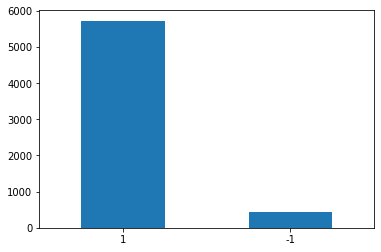

In [46]:
filtered_data['Ambigous'].value_counts().plot.bar(rot=0)

In [47]:
def concatenate_content(data):
    positive_doc = []
    negative_doc = []
    for i in data.index:
        row = data.loc[i, 'Ambigous']
        text = data.loc[i, 'Review Text']
        if(row == 1):
            positive_doc.append(text)
        else:
            negative_doc.append(text)
    return positive_doc, negative_doc

In [48]:
positive, negative = concatenate_content(filtered_data)

In [49]:
positive_concat = " ".join(positive)
negative_concat = " ".join(negative)

In [50]:
type(positive_concat)

str

In [51]:
# from wordcloud import WordCloud, STOPWORDS 
# import matplotlib.pyplot as plt 
# import pandas as pd 
  
# # Reads 'Youtube04-Eminem.csv' file  
# #df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1") 
  
# comment_words = '' 
# stopwords = set(STOPWORDS) 
  
# # iterate through the csv file 
# for val in df.CONTENT: 
      
#     # typecaste each val to string 
#     val = str(val) 
  
#     # split the value 
#     tokens = val.split() 
#     # Converts each token into lowercase 
#     for i in range(len(tokens)): 
#         tokens[i] = tokens[i].lower() 
      
#     comment_words += " ".join(tokens)+" "
  
# wordcloud = WordCloud(width = 800, height = 800, 
#                 background_color ='white', 
#                 stopwords = stopwords, 
#                 min_font_size = 10).generate(comment_words) 
  
# # plot the WordCloud image                        
# plt.figure(figsize = (8, 8), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 
  
# plt.show()

In [52]:
print(positive_concat)

stayed nights great location taking express like location walking distance bath small clean free staff friendly helpful taxi would stanza solo come quei tutti location next park close great shopping nearby also great mandarin oriental best perhaps even best property needs great service nice upgrade large used feel like real like getting first class good know better time drunk biz-pople mixed crowd dinner closed flew week basement cozy elegant still great property fantastic bangkok property worthy mo-brand still good make mistake call redo reception first floor area seating touch-up impression much better mandarin five star rating beautiful spacious wonderful great service staff perfectly next subway even quite ready check-in staff made sure could interim also quite lovely plan future breakfast maria wonderful stayed honeymoon bought champagne first night make little special incredibly friendly especially helpful around booking different right front desk would anyone personable always l

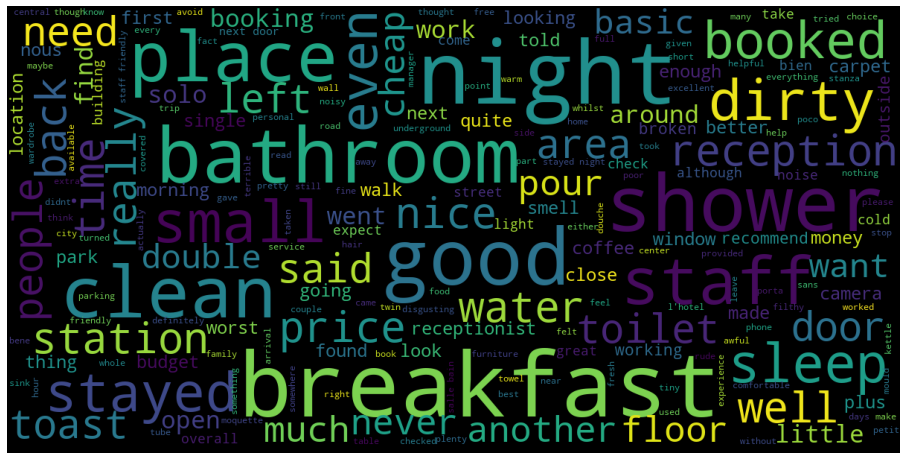

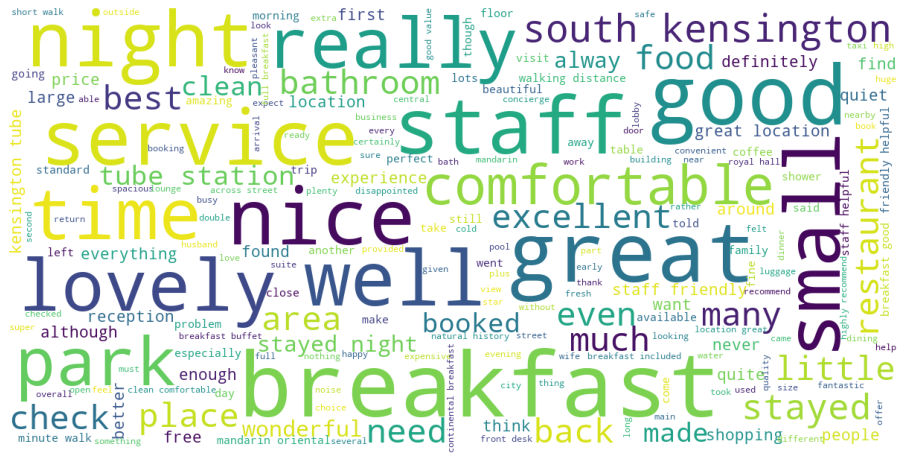

In [53]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, colour, title = None):
    wordcloud = WordCloud(
        background_color=colour,
        stopwords=stopwords,
        max_words=400,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(16, 16))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(negative_concat, 'black')
show_wordcloud(positive_concat, 'white')

In [54]:

negative_comments=tokenize(negative_concat)
positive_comments=tokenize(positive_concat)

In [55]:
import gensim
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
stemmer=SnowballStemmer("english")

In [56]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for sample in text:
        stem = []
        tokenized=tokenize(sample)
        for token in tokenized:
            if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
                stem.append(lemmatize_stemming(token))
        result.append(stem)
    return result

In [57]:
try:
    positive_stemmed=preprocess(positive)
    negative_stemmed=preprocess(negative)
except LookupError:
    nltk.download('wordnet')
    positive_stemmed=preprocess(positive)
    negative_stemmed=preprocess(negative)

In [58]:
dictionary_positive = gensim.corpora.Dictionary(positive_stemmed)
dictionary_negative = gensim.corpora.Dictionary(negative_stemmed)

In [59]:
bow_corpus_positive = [dictionary_positive.doc2bow(doc) for doc in positive_stemmed]
bow_corpus_negative = [dictionary_negative.doc2bow(doc) for doc in negative_stemmed]

In [60]:
from gensim import corpora, models
tfidf_positive = models.TfidfModel(bow_corpus_positive)
tfidf_negative = models.TfidfModel(bow_corpus_negative)

#corpus_tfidf_positive = tfidf[bow_corpus_positive]
#corpus_tfidf_negative = tfidf[bow_corpus_negative]
# Fixed this since tfidf is not defined -Mitja
corpus_tfidf_positive = tfidf_positive
corpus_tfidf_negative = tfidf_negative

In [61]:
lda_model_positive = gensim.models.LdaMulticore(bow_corpus_positive, num_topics=5, id2word=dictionary_positive, passes=2, workers=2)
lda_model_negative = gensim.models.LdaMulticore(bow_corpus_negative, num_topics=5, id2word=dictionary_negative, passes=2, workers=2)

In [62]:
#print(lda_model[bow_corpus[0]])
# lda_model is not defined
# 

In [63]:
for idx, topic in lda_model_positive.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.019*"breakfast" + 0.014*"staff" + 0.011*"pour" + 0.011*"good" + 0.010*"clean" + 0.009*"nice" + 0.009*"servic" + 0.009*"petit" + 0.009*"nous" + 0.008*"stay"
Topic: 1 
Words: 0.013*"camera" + 0.010*"park" + 0.009*"breakfast" + 0.008*"staff" + 0.008*"like" + 0.007*"come" + 0.006*"locat" + 0.006*"nice" + 0.006*"check" + 0.006*"excelent"
Topic: 2 
Words: 0.015*"locat" + 0.015*"breakfast" + 0.013*"staff" + 0.013*"great" + 0.013*"good" + 0.010*"time" + 0.010*"nice" + 0.007*"clean" + 0.007*"friend" + 0.007*"night"
Topic: 3 
Words: 0.020*"staff" + 0.019*"breakfast" + 0.018*"good" + 0.014*"night" + 0.014*"locat" + 0.013*"walk" + 0.013*"great" + 0.012*"stay" + 0.011*"clean" + 0.009*"small"
Topic: 4 
Words: 0.023*"breakfast" + 0.019*"good" + 0.016*"staff" + 0.015*"great" + 0.014*"locat" + 0.012*"servic" + 0.012*"nice" + 0.011*"tube" + 0.011*"time" + 0.009*"kensington"


In [64]:
for idx, topic in lda_model_negative.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.018*"good" + 0.016*"breakfast" + 0.015*"night" + 0.011*"staff" + 0.010*"like" + 0.009*"bathroom" + 0.009*"clean" + 0.008*"book" + 0.008*"price" + 0.008*"shower"
Topic: 1 
Words: 0.015*"solo" + 0.011*"camera" + 0.011*"poco" + 0.010*"petit" + 0.008*"bene" + 0.007*"l'hotel" + 0.007*"pour" + 0.007*"douch" + 0.006*"sall" + 0.006*"fare"
Topic: 2 
Words: 0.020*"night" + 0.013*"place" + 0.012*"book" + 0.010*"breakfast" + 0.009*"shower" + 0.009*"staff" + 0.009*"leav" + 0.008*"clean" + 0.007*"sleep" + 0.007*"small"
Topic: 3 
Words: 0.014*"shower" + 0.012*"bathroom" + 0.011*"work" + 0.010*"breakfast" + 0.009*"night" + 0.008*"book" + 0.008*"good" + 0.007*"station" + 0.007*"place" + 0.007*"clean"
Topic: 4 
Words: 0.020*"breakfast" + 0.013*"night" + 0.013*"good" + 0.012*"clean" + 0.009*"staff" + 0.009*"bathroom" + 0.009*"shower" + 0.008*"book" + 0.007*"dirti" + 0.007*"sleep"


In [65]:
# Task 7
from empath import Empath

lexicon = Empath()

# analyze positive dict
topics = lda_model_positive.show_topics()
positive_topics = []
for topic in topics:
    # find words and add to list
    words = re.compile('[A-Za-z]+').findall(topic[1])
    positive_topics.extend(words)
# create string from list and analyze it with empath
positive_topics_str = " ".join(positive_topics)
positive_dict = lexicon.analyze(positive_topics_str)
nonzero_positive_dict = positive_dict.copy()
# Remove zero value categories
for key, value in positive_dict.items():
    if value == 0:
        del nonzero_positive_dict[key]
print(nonzero_positive_dict)


{'help': 1.0, 'office': 5.0, 'domestic_work': 3.0, 'vacation': 4.0, 'morning': 5.0, 'social_media': 1.0, 'night': 2.0, 'driving': 1.0, 'pet': 1.0, 'cooking': 5.0, 'movement': 1.0, 'eating': 5.0, 'restaurant': 5.0, 'hygiene': 3.0, 'politeness': 4.0, 'traveling': 2.0, 'shape_and_size': 1.0, 'party': 2.0, 'cleaning': 3.0, 'friends': 5.0, 'achievement': 3.0, 'alcohol': 1.0, 'liquid': 1.0, 'positive_emotion': 4.0}


In [66]:
# analyze negative dict
topics = lda_model_negative.show_topics()
negative_topics = []
for topic in topics:
    # find words and add to list
    words = re.compile('[A-Za-z]+').findall(topic[1])
    negative_topics.extend(words)
# create string from list and analyze it with empath
negative_topics_str = " ".join(negative_topics)
negative_dict = lexicon.analyze(negative_topics_str)
nonzero_negative_dict = negative_dict.copy()
# Remove zero value categories
for key, value in negative_dict.items():
    if value == 0:
        del nonzero_negative_dict[key]
print(nonzero_negative_dict)


{'office': 3.0, 'dance': 1.0, 'money': 1.0, 'domestic_work': 7.0, 'sleep': 3.0, 'vacation': 5.0, 'tourism': 1.0, 'morning': 4.0, 'social_media': 1.0, 'night': 6.0, 'real_estate': 1.0, 'home': 3.0, 'business': 1.0, 'cooking': 4.0, 'reading': 4.0, 'eating': 4.0, 'restaurant': 4.0, 'hygiene': 11.0, 'air_travel': 1.0, 'music': 1.0, 'vehicle': 1.0, 'shopping': 1.0, 'work': 1.0, 'valuable': 1.0, 'traveling': 1.0, 'economics': 1.0, 'shape_and_size': 1.0, 'negotiate': 1.0, 'cleaning': 11.0, 'payment': 1.0, 'alcohol': 1.0, 'liquid': 1.0, 'writing': 4.0, 'musical': 1.0}


In [67]:
# TODO Add findings to Database 1 after task6 is reported there

In [68]:
#Task 8

# Count overlapping ratio
positive_empath_categories = len(nonzero_positive_dict)
negative_empath_categories = len(nonzero_negative_dict)
all_empath_categories = len(positive_dict)

overlapping_ratio = round((positive_empath_categories + negative_empath_categories) / all_empath_categories, 5)
print("Overlapping ratio: " + str(overlapping_ratio))

Overlapping ratio: 0.29897


In [69]:
#Task 9

total_topics = []
total_topics.extend(positive_topics)
total_topics.extend(negative_topics)
# remove duplicate topics
total_topics_cleaned = list(set(total_topics))
print(total_topics_cleaned)
print("\nLDA has a total of {} unique topics".format(len(total_topics_cleaned)))


['night', 'staff', 'excelent', 'book', 'clean', 'servic', 'work', 'l', 'bathroom', 'price', 'solo', 'douch', 'walk', 'good', 'nice', 'small', 'camera', 'friend', 'time', 'poco', 'kensington', 'locat', 'park', 'come', 'tube', 'dirti', 'pour', 'place', 'check', 'bene', 'breakfast', 'shower', 'sall', 'petit', 'fare', 'hotel', 'leav', 'station', 'nous', 'like', 'stay', 'great', 'sleep']

LDA has a total of 43 unique topics


In [70]:
# Create list of all Empath pre-built categories
empath_categories = []
for key, value in positive_dict.items():
    empath_categories.append(key)
print(empath_categories)

['help', 'office', 'dance', 'money', 'wedding', 'domestic_work', 'sleep', 'medical_emergency', 'cold', 'hate', 'cheerfulness', 'aggression', 'occupation', 'envy', 'anticipation', 'family', 'vacation', 'crime', 'attractive', 'masculine', 'prison', 'health', 'pride', 'dispute', 'nervousness', 'government', 'weakness', 'horror', 'swearing_terms', 'leisure', 'suffering', 'royalty', 'wealthy', 'tourism', 'furniture', 'school', 'magic', 'beach', 'journalism', 'morning', 'banking', 'social_media', 'exercise', 'night', 'kill', 'blue_collar_job', 'art', 'ridicule', 'play', 'computer', 'college', 'optimism', 'stealing', 'real_estate', 'home', 'divine', 'sexual', 'fear', 'irritability', 'superhero', 'business', 'driving', 'pet', 'childish', 'cooking', 'exasperation', 'religion', 'hipster', 'internet', 'surprise', 'reading', 'worship', 'leader', 'independence', 'movement', 'body', 'noise', 'eating', 'medieval', 'zest', 'confusion', 'water', 'sports', 'death', 'healing', 'legend', 'heroic', 'celebr

In [71]:
# Calculate agreement between empath categories and LDA
common_categories = 0
for category in total_topics_cleaned:
    if category in empath_categories:
        common_categories = common_categories + 1
print("LDA and empath have {} common categories".format(common_categories))


LDA and empath have 3 common categories


In [72]:
# Calculate overlapping ratio
overlapping_ratio2 = round(common_categories/len(total_topics_cleaned), 5)
print("Overlapping ratio 2 : " + str(overlapping_ratio2))

Overlapping ratio 2 : 0.06977


In [73]:
from nltk.corpus import wordnet
from nltk.corpus.reader.wordnet import WordNetError

In [ ]:
categories_positive=[['price', 0, wordnet.synsets('price')[0]], ['service', 0, wordnet.synsets('service')[0]], ['food', 0, wordnet.synsets('food')[0]], ['room', 0, wordnet.synsets('room')[0]], ['location', 0, wordnet.synsets('location')[0]], ['parking', 0, wordnet.synsets('parking')[0]]]
categories_negative=[['price', 0, wordnet.synsets('price')[0]], ['service', 0, wordnet.synsets('service')[0]], ['food', 0, wordnet.synsets('food')[0]], ['room', 0, wordnet.synsets('room')[0]], ['location', 0, wordnet.synsets('location')[0]], ['parking', 0, wordnet.synsets('parking')[0]]]
largest_similarity=0
for item in positive_comments:
    largest_similarity=0
    synset=wordnet.synsets(item)
    if len(synset)>0:
        try:
            for i in categories_positive:
                similarity=i[2].wup_similarity(synset[0])
                if similarity!=None:
                    if similarity>largest_similarity:
                        largest_similarity=similarity
                        best_category=i[0]
        except WordNetError:
            continue
        for n in categories_positive:
            if n[0]==best_category:
                n[1]=n[1]+1
for item in negative_comments:
    largest_similarity=0
    synset=wordnet.synsets(item)
    if len(synset)>0:
        try:
            for i in categories_negative:
                similarity=i[2].wup_similarity(synset[0])
                if similarity!=None:
                    if similarity>largest_similarity:
                        largest_similarity=similarity
                        best_category=i[0]
        except WordNetError:
            continue
        for n in categories_negative:
            if n[0]==best_category:
                n[1]=n[1]+1

In [ ]:
#plt.plot([categories[0][1], categories[1][1], categories[2][1], categories[3][1], categories[4][1], categories[5][1]])
plt.bar([categories_positive[0][0], categories_positive[1][0], categories_positive[2][0], categories_positive[3][0], categories_positive[4][0], categories_positive[5][0]], [categories_positive[0][1], categories_positive[1][1], categories_positive[2][1], categories_positive[3][1], categories_positive[4][1], categories_positive[5][1]])
plt.show()
plt.bar([categories_negative[0][0], categories_negative[1][0], categories_negative[2][0], categories_negative[3][0], categories_negative[4][0], categories_negative[5][0]], [categories_negative[0][1], categories_negative[1][1], categories_negative[2][1], categories_negative[3][1], categories_negative[4][1], categories_negative[5][1]])
plt.show()